# Quiz 2: python essentials and data analysis

#### Date: 20 September 2024

#### Credits: 20 points

- When you finish, please send a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- This classwork is **individual**. Please include your name in the notebook.


- Copying and pasting code from **AI applications is a breach of academic integrity**. Code should be your own!


- Within a **single python notebook**, solve the following problems:

## Name: Rolando Sánchez

### Problem 1 (Fermi-Dirac distribution, 10 points):

The **Fermi-Dirac distribution** describes the probability that a quantum state with energy $E$ is occupied by a fermion (e.g. by an electron) at thermal equilibrium. The Fermi-Dirac distribution is:

$$f(E) = \frac{1}{e^{(E - E_{\rm F})/k_B T} + 1}$$

Where:

- $f(E)$ is the probability that a state with energy $E$ is occupied.

- $E$ is the energy of the state.

- $E_{\rm F}$ is the chemical potential (also called the Fermi level at $T=0\,\rm K$).

- $k_B$ is the Boltzmann constant.

- $T$ is the absolute temperature.

The exponential term $e^{(E - E_{\rm F})/k_B T}$ controls how the occupancy changes with energy and temperature.

### Tasks:

(a) Create a python lambda function to convert the Boltzmann constant from SI units ($\rm J/K$) to units of $\rm eV/K$ (**Hint:** using the fundamental constants from scipy may be helpful).

(b) Create a python function that reads in the Fermi level, the absolute temperature, and the energy of the state, and then returns the (Fermi-Dirac) probability distribution function, $f(E)$. The Boltzmann constant should be in units of $\rm eV/K$.

(c) Define a python dictionary containing the symbols of the $5$ following materials as "keys" with their respective Fermi levels ($E_{\rm F}$) as elements.

- Silicon ($\rm Si$) has $E_{\rm F}=1.1\,\rm eV$

- Gallium Arsenide ($\rm Ga\,As$) has $E_{\rm F}=1.4\,\rm eV$

- Gold ($\rm Au$) has $E_{\rm F}=5.5\,\rm eV$

- Copper ($\rm Cu$) has $E_{\rm F}=7\,\rm eV$

- Aluminum ($\rm Al$) has $E_{\rm F}=11.6\,\rm eV$



(d) Generate a 1D energy vector covering a reasonable range of energies in $\rm eV$, and fix the temperature of the gas at $100\,\rm K$.

(e) Using the values of Fermi levels ($E_{\rm F}$) from the dictionary in point (c), and the fixed energy vector and temperature defined in point (d), call the function created in point (b) to obtain a set of arrays with the Fermi-Dirac distributions, $f(E)$, for each material. (**Hint:** a for loop can help access the dictionary elements).

(f) Use matplotlib to make a single high-quality labeled plot of the energy distribution of all 5 materials for the set temperature. The plot should have $f(E)$ on the Y axis and $E$ on the X axis.

(g) Repeat steps (d,e,f) for 3 more temperatures ($0\,\rm K$, $400\,\rm K$, and $1000\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. Each panel should show the results for each temperature ($0\,\rm K$, $100\,\rm K$, $400\,\rm K$, and $1000\,\rm K$).


### Analysis:

Based on your plots, answer the following questions:

(h) What happens with the energy distributions at low temperatures? Particularly, at $0\,\rm K$?

(i) What happens with the fermion distributions in the materials when we increase the temperature? Why?

(j) Can we classify the materials in groups using their $f(E)$ distributions at a fixed temperature? Why do some materials have higher $E_{\rm F}$ than others?

## Solution

In [1]:
#Importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd #To read and organize files
import scipy.constants as cte #To get physical constants
import scipy.optimize as opt #To get the right parameters
import scipy.stats as st #To get statistic coefficients (Pearson, Spearman, etc) 

(a) Create a python lambda function to convert the Boltzmann constant from SI units ($\rm J/K$) to units of $\rm eV/K$ (**Hint:** using the fundamental constants from scipy may be helpful).

In [2]:
#Lambda Function
conv_k = lambda kbJ: kbJ*(6.242*10**(18))

In [3]:
#Defining and converting constants
kbJ = cte.k #[J/K]
kb = conv_k(kbJ) #[eV/K]
print("Boltzmann constant in [J/K] :", kbJ, "[J/K]")
print("Boltzmann constant converted in [eV/K] :", kb, "[eV/K]") 

Boltzmann constant in [J/K] : 1.380649e-23 [J/K]
Boltzmann constant converted in [eV/K] : 8.618011058000001e-05 [eV/K]


(b) Create a python function that reads in the Fermi level, the absolute temperature, and the energy of the state, and then returns the (Fermi-Dirac) probability distribution function, $f(E)$. The Boltzmann constant should be in units of $\rm eV/K$.

In [4]:
def fermi_pdf(ef, T, en):
    """
    Function that reads Fermi level, absolute temperature, and the 
    energy of the state to calculate the Fermi-Dirac probability 
    distribution function value.
    Inputs:
        ef (array, float) -> Fermi energy [eV]
        T (float) -> Absolute Temperature [K]
        en (array, float) -> energies of the states [eV]
    Outputs: 
        pdf (array, float)-> Probability Density Function value
    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    den = (np.exp((en-ef)/(kb*T))+1)
    pdf = 1/den
    return pdf

(c) Define a python dictionary containing the symbols of the $5$ following materials as "keys" with their respective Fermi levels ($E_{\rm F}$) as elements.

- Silicon ($\rm Si$) has $E_{\rm F}=1.1\,\rm eV$

- Gallium Arsenide ($\rm Ga\,As$) has $E_{\rm F}=1.4\,\rm eV$

- Gold ($\rm Au$) has $E_{\rm F}=5.5\,\rm eV$

- Copper ($\rm Cu$) has $E_{\rm F}=7\,\rm eV$

- Aluminum ($\rm Al$) has $E_{\rm F}=11.6\,\rm eV$



In [5]:
levels_dic = {"Si":1.1, "Ga As":1.4, "Au":5.5,"Cu":7.0,"Al":11.6}

(d) Generate a 1D energy vector covering a reasonable range of energies in $\rm eV$, and fix the temperature of the gas at $100\,\rm K$.

In [6]:
energies = np.linspace(-1,14,10000) #[eV]

In [7]:
T1 = 100. #[K]

(e) Using the values of Fermi levels ($E_{\rm F}$) from the dictionary in point (c), and the fixed energy vector and temperature defined in point (d), call the function created in point (b) to obtain a set of arrays with the Fermi-Dirac distributions, $f(E)$, for each material. (**Hint:** a for loop can help access the dictionary elements).


In [8]:
def evaluating_pdf(levels_dic,energies,T):
    """
    Evaluates the Fermi-Dirac PDF for each Fermi Energy corresponding to different materials.

    Inputs:
        levels_dic (dictionary) -> Contains the symbol and E_F value for that material
        energies (array, float) -> Energies of the states [eV]
        T (float) -> Absolute Temperatur [K]
    Outputs: 
        pdfs (array, array)-> Array containing other arrays with the PDF values for each material
    
    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    #Initialize a list that will contain arrays with each pdf value for given T,
    #Fermi energy, and energy of state
    pdfs=[]
    for i in levels_dic:
        #get the Fermi level
        Ef = levels_dic[i]
        #Calculate the value of the pdf
        pdf_i = fermi_pdf(Ef,T,energies)
        #Append array to the list
        pdfs.append(pdf_i)

    return pdfs

In [9]:
# I've used "1" to name this as we'll have a lower T in the following problems

pdfs1 = evaluating_pdf(levels_dic, energies, T1) #PDF for T = 100 [k]

/tmp/ipykernel_22301/1450818310.py:15: RuntimeWarning: overflow encountered in exp
  den = (np.exp((en-ef)/(kb*T))+1)



(f) Use matplotlib to make a single high-quality labeled plot of the energy distribution of all 5 materials for the set temperature. The plot should have $f(E)$ on the Y axis and $E$ on the X axis.



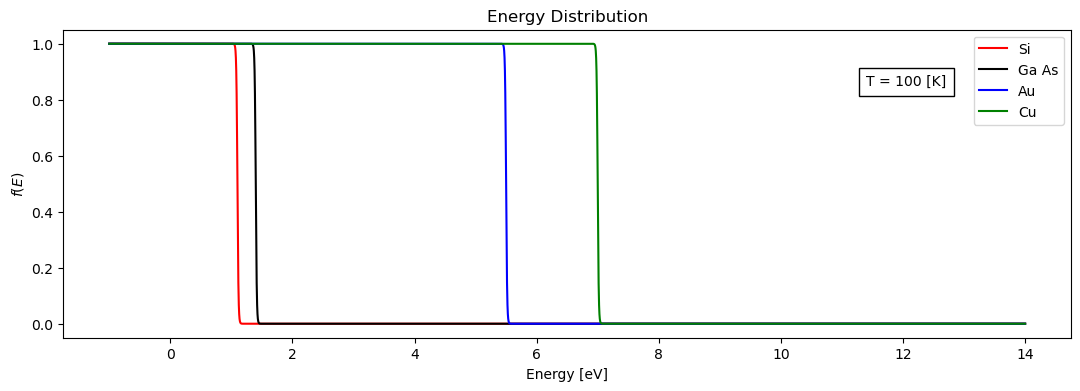

In [10]:
# Plot

plt.figure(figsize = (13,4))

plt.title('Energy Distribution')
plt.xlabel('Energy [eV]')
plt.ylabel('$f(E)$')

#Using loops to avoid copy-pasting for each material

keys = list(levels_dic.keys())
colors = ['r','k','b','g','purple']
for i in range(len(pdfs1)-1):
    plt.plot(energies, pdfs1[i], color = colors[i], label = keys[i])

plt.text(11.4, 0.85, 'T = 100 [K]',bbox=dict(facecolor='none', edgecolor='black', boxstyle='square,pad=0.5') )

plt.legend()
plt.show()
plt.close()

(g) Repeat steps (d,e,f) for 3 more temperatures ($0\,\rm K$, $400\,\rm K$, and $1000\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. Each panel should show the results for each temperature ($0\,\rm K$, $100\,\rm K$, $400\,\rm K$, and $1000\,\rm K$).

In [11]:
#Fixing absolute temperatures in order
T0 = 0. #[K]
T2 = 400. #[K]
T3 = 1000. #[K]

#Defining a list with the absolute T's in order
Ts = [T0, T1, T2, T3]

In [12]:
#Calling the evaluating function to get the results for each T

pdfs0 = evaluating_pdf(levels_dic, energies, T0) #PDF for T = 0 [k]
pdfs2 = evaluating_pdf(levels_dic, energies, T2) #PDF for T = 400 [k]
pdfs3 = evaluating_pdf(levels_dic, energies, T3) #PDF for T = 1000 [k]
pdfss = [pdfs0,pdfs1,pdfs2,pdfs3]

/tmp/ipykernel_22301/1450818310.py:15: RuntimeWarning: divide by zero encountered in divide
  den = (np.exp((en-ef)/(kb*T))+1)


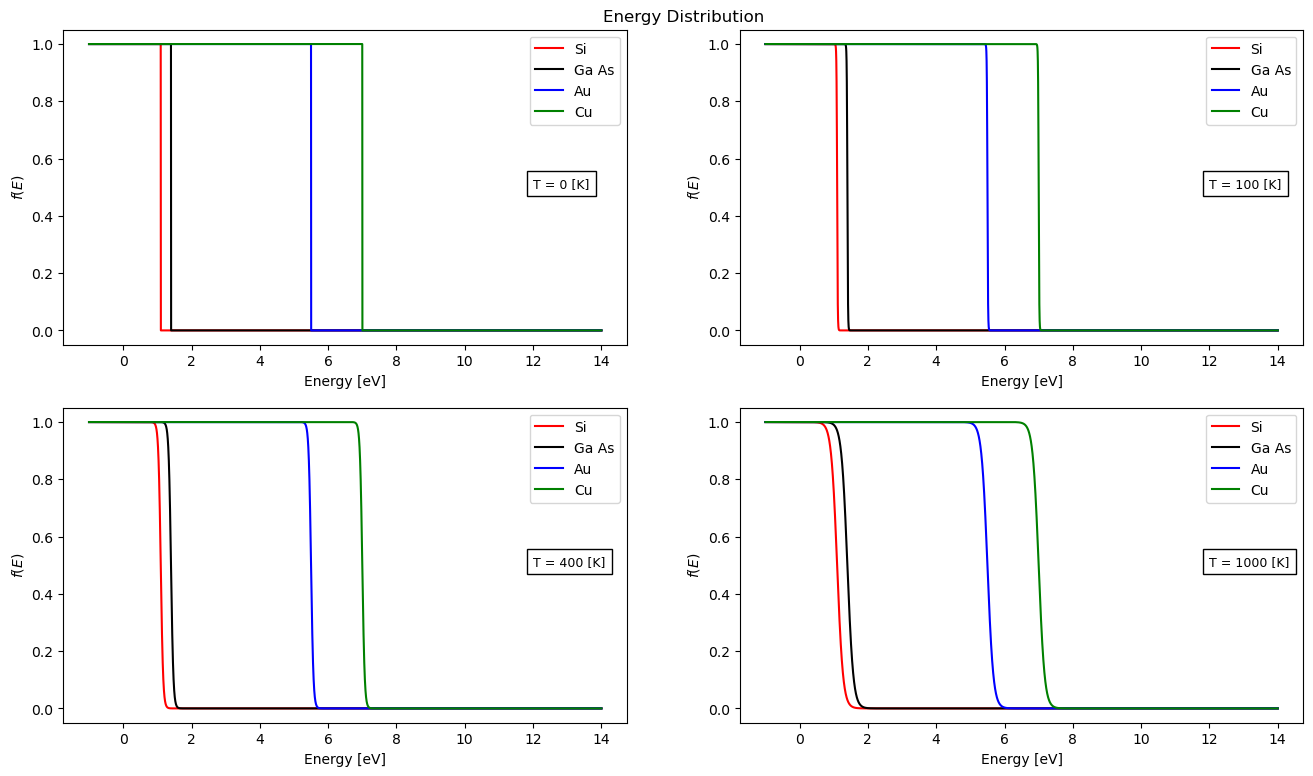

In [13]:
# Plot

plt.figure(figsize = (16,9))

# To show a title without showing axis around the 4 panels
plt.title('Energy Distribution')
plt.axis("off")

#Each subplot, using loop to avoid copy and pasting for each panel
for j in range(4):
    plt.subplot(2,2,j+1)
    plt.xlabel('Energy [eV]')
    plt.ylabel('$f(E)$')
    keys = list(levels_dic.keys())
    colors = ['r','k','b','g','purple']
    pdfsi = pdfss[j]
    
    #Again, for each material 
    #I've used a box to show which T is in each given panel.  
    for i in range(len(pdfsi)-1):
        plt.plot(energies, pdfsi[i], color = colors[i], label = keys[i])
    plt.text(12, 0.5, 'T = %.f [K]' %(Ts[j]),fontsize= 9 ,bbox=dict(facecolor='none', edgecolor='black', boxstyle='square,pad=0.5') )
    plt.legend()


plt.show()
plt.close()

### Analysis:

Based on your plots, answer the following questions:

(h) What happens with the energy distributions at low temperatures? Particularly, at $0\,\rm K$?

(i) What happens with the fermion distributions in the materials when we increase the temperature? Why?

(j) Can we classify the materials in groups using their $f(E)$ distributions at a fixed temperature? Why do some materials have higher $E_{\rm F}$ than others?

**Answers**

(h) So, for low temperatures the distribution becomes more like a step-function with a sharp change from 1 to 0, until at T = 0 K distribution is actually a step function. The transition, physically, tells us that the states with energies lower than $E_F$ are fully occupied by the specific fermions in the system and the more energetic states are, in the other hand, empty.


(i) As the temperature increases the transition around $E_F$ smoothens, therefore we have states with energies closer from the low part to $E_F$ with a lower probability of being occupied, while states just a little above $E_F$ have a probability different from zero of being occupied. Basically this is a consequence of the "extra" energy that temperature represents, as fermions gain thermal energy they may have enough energy to jump to higher energy states that they previously couldn't reach at lower temperatures. 

(j) Yes, if we consider this distribution for electronic structure in energy bands we could classify materials into conductors, semiconductors and insulators by looking at the "available" non-occupied states that can contribute to conductivity, for example. <br>
And some materials may have higher $E_F$ as they have a bigger number of free electrons. 

However, in order to provide a more accurate answer, according to *Kittel, Charles. Introduction to Solid State Physics.* , the Fermi energy for a 3D, non-relativistic, non-interacting ensemble of identical half spin fermions, like the electrons, is given by $E_F = \frac{\hbar ^2}{2 m_e}(\frac{3 \pi ^2 N}{V})^{\frac{2}{3}}$, with N as the number of free electrons and V the volume. From where we can define a density $\rho$ of free electrons and therefore, it's correct to associate a higher number of free electrons to a higher value in the $E_F$.

## Problem 2 (Analysis of atmospheric $^{14}CO_2$, 10 points):

The value of $\Delta^{14}\text{CO}_2$ is defined as the relative difference in the ratio of $^{14}\text{C}$ to $^{12}\text{C}$ in a sample compared to a standard, corrected for isotopic fractionation and radioactive decay. It is expressed as:

$$
\Delta^{14}\text{CO}_2 = \left( \frac{\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{sample}}}{\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{standard}}} - 1 \right) \times 1000
$$

where:

-  $\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{sample}} $ is the ratio of $^{14}\text{C}$ to $^{12}\text{C}$ in the sample,

- $\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{standard}} $ is the ratio in a standard reference material.


The result is given in permil (‰).


### Data file:

Please download the data file from here:

https://github.com/wbandabarragan/physics-teaching-data/tree/main/1D-data/BHD_14CO2_datasets_20211013.csv


This data file has 60 years of $\Delta^{14}\text{CO}_2$ measurements from New Zealand. The measurements show the rise of the $^{14}\rm C$ due to the so-called **bomb spike** (from nuclear bomb testing), and the subsequent decline in $\Delta^{14}\text{CO}_2$ due to ban of nuclear bomb tests, the natural carbon cycle, and the increase of fosil fuel-based $\rm CO_2$ emissions. Scientists use this data to understand how quickly atmospheric $\rm CO_2$ flows in and out of the oceans and terrestrial ecosystems. We will solely use the first two columns of the file, following the header, i.e. the columns labeled as "Date" and "D14C_trend".

#### Reference:
https://doi.org/10.5194/acp-17-14771-2017

### Tasks:

(a) Inspect the structure of the data file. Then, create an appropriate IO python function that reads the filename, opens the data file using pandas, skips the header lines, place the first two columns ("Date" and "D14C_trend") into pandas objects, and returns them as numpy arrays.

(b) Call your IO function developed in (a) and obtain the time/date axis (in $[yr]$) and $\Delta^{14}\text{CO}_2$ (in ‰). Then, make a high-quality labeled plot of $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis).

(c) Is the relation between the two variables linear? Is it monotonic?

(d) Create a python function that identifies the year/date ($t_{\rm max}$) at which the bomb spike reached a maximum ($\Delta^{14}_{\rm max}\text{CO}_2$), and returns the peak coordinate pair: $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$.

(e) Propose a physically-motivated model for the data. Write down your proposed model in a markdown cell, and clearly indicate what the variables and free parameters are. Justify the number of free parameters that you have chosen. **Hint:** Since $\Delta^{14}\text{CO}_2$ involves radioactive decay, using a piece-wise function with exponentials ($\propto \exp{(\pm k\,t)}$ with $k$ being the growth/decay rate) may be a good choice. You should also use the peak coordinate pair $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$ computed in (d) to define your model and reduce the number of free parameters.

(f) Carry out a regression using python tools (e.g. scipy's **curve_fit** function). Report the best-fit function, and comment: what is the decay rate, $k_{\rm fit}$ of $\Delta^{14}\text{CO}_2$? **Hint:** Since the fitting function is not a simple polynomial function, in some implementations it may help to aid curve_fit by providing initial guesses for the free parameters in the regression (see: p0 argument).

(g) Report the result of your regression including the uncertainties associated with each free parameter in your model, and calculate the global uncertainty obtained via error propagation.

(h) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing both the empirical data and the best-fit model (obtained from your physically-motivated model, including the uncertainties). Does your model explain the empirical data?

### Analysis:

(i) Now, you will compare your findings with four semi-empirical decay rate predictions, taken from the litarature. Create a function that uses your model, but uses four predictions for the decay rate ($k_{\rm atm}$, $k_{\rm bio}$, $k_{\rm oce}$, and $k_{\rm sed}$) to return four semi-empirical $\Delta^{14}\text{CO}_2$ decay lines as arrays. Consider the following decay rates based on four contributing factors:

- **Atmospheric decay** due to the mixing and exchange of carbon dioxide in the atmosphere predicts $k_{\rm atm}=0.10\,\rm yr^{-1}$.

- **Biosphere decay** due to vegetation, soil, and organic matter predicts $k_{\rm bio}=0.02\,\rm yr^{-1}$.

- **Ocean decay** due to the long-term ocean absorption and storage of carbon predicts $k_{\rm oce}=0.01\,\rm yr^{-1}$.

- **Sedimentary decay** due to decomposition and mineralization predicts $k_{\rm sed}=0.001\,\rm yr^{-1}$.

(j) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing the empirical data, your best-fit model (obtained from your physically-motivated model, including the uncertainties), and four additional lines (one for every contributing factor above). Can we explain the observed decay of $\Delta^{14}\text{CO}_2$ as due to a single one of these contributing factors? If not, propose a possible decay model for $k_{\rm fit}$ based on all of them.

## Solution

(a) Inspect the structure of the data file. Then, create an appropriate IO python function that reads the filename, opens the data file using pandas, skips the header lines, place the first two columns ("Date" and "D14C_trend") into pandas objects, and returns them as numpy arrays.

In [14]:
filename = "/home/rolando/Downloads/Yachay/7th Semester/computational_physics/exams/data/BHD_14CO2_datasets_20211013.csv"

In [15]:
# First, I've used vim in Linux to inspect the data and recognize that I needed to skip 15 rows to get the information that we want
# So, here I just try to do it before defining the function to check if it works
# pd.read_csv(filename, sep = ",",skiprows=15)

In [16]:
# Defining the IO function
def io_data(filename):
    """
    This is an I/O function that opens a file with data
    and return data arrays.
    Input: filename (str)
    Outputs: date, dc14c (arrays) -> date contains date/time data in years
                                        and dc14c contains the CO2 relative difference in the ratio
    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    
    # Create a pandas df
    df = pd.read_csv(filename, sep = ",",skiprows=15)
    
    # Extract the arrays
    date = np.array(df["Date"])
    dc14c = np.array(df["D14C_trend"])
    
    return date, dc14c

(b) Call your IO function developed in (a) and obtain the time/date axis (in $[yr]$) and $\Delta^{14}\text{CO}_2$ (in ‰). Then, make a high-quality labeled plot of $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis).


In [17]:
date, dc14c = io_data(filename)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_22301/1418909122.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time vs $\Delta ^{14}{CO}_2$')
/tmp/ipykernel_22301/1418909122.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta ^{14}{CO}_2$[‰]')


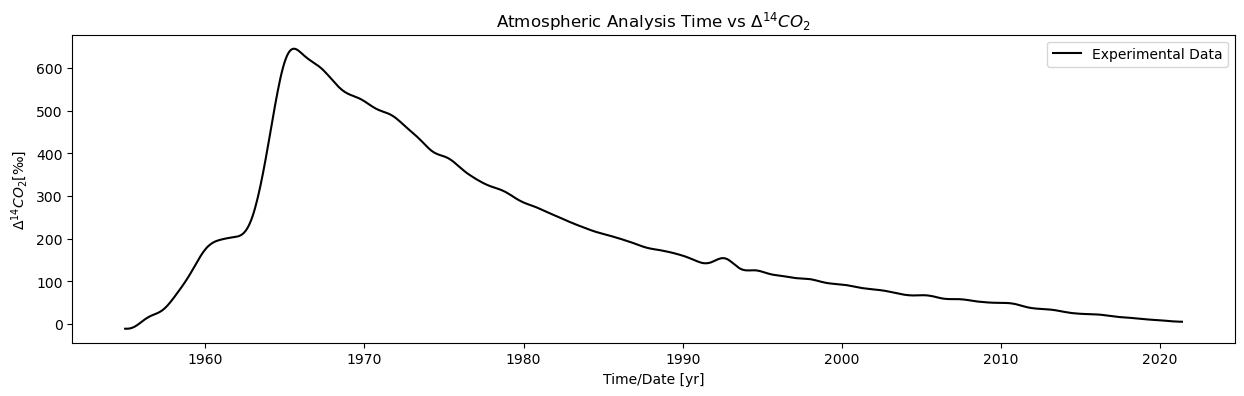

In [18]:
# Plot
plt.figure(figsize = (15,4))

plt.title('Atmospheric Analysis Time vs $\Delta ^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta ^{14}{CO}_2$[‰]')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")

plt.legend()
plt.show()
plt.close()

(c) Is the relation between the two variables linear? Is it monotonic?



In [19]:
sp = st.spearmanr(date,dc14c)
pe = st.pearsonr(date, dc14c)

In [20]:
print("Spearman Coefficient: ", sp[0])
print("Pearson Coefficient: ", pe[0])

Spearman Coefficient:  -0.6686656574660026
Pearson Coefficient:  -0.634230568177452


For all the date/time range, the correlation looks increasing monotonic until some date around 1950 and the decreasing monotonic since that date (Therefore that negative sign in the Separman coefficient, as we have more data since that date)   

Then, the Pearson coefficient is too low to assume linearity, therfore we can't consider the relation as a linear relation.

(d) Create a python function that identifies the year/date ($t_{\rm max}$) at which the bomb spike reached a maximum ($\Delta^{14}_{\rm max}\text{CO}_2$), and returns the peak coordinate pair: $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$.

In [21]:
def peak(date, dc14c):
    """
    This function identifies the date (t_max) at which the bomb 
    spike reached a maximum (dc14c_max), and returns the 
    peak coordinate pair: (t_max, dc14c_max).
    
    Input:
        date (numpy array, float): dates/time in years.
        dc14c (numpy array, float): CO2 relative difference in the ratio values.
    
    Outputs:
        (t_max, dc14c_max): Tuple with the maximum date and maximum CO2 relative difference in the ratio.
    
    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    #Getting the index of the maximum in y-axis, CO2 relative difference in the ratio
    max_index = np.argmax(dc14c)
    #Using that index to get the date t_max
    t_max = date[max_index]
    
    dc14c_max = dc14c[max_index]
    
    return t_max, dc14c_max

In [22]:
#Calling the function
t_max, dc14c_max = peak(date, dc14c)

print("The peak coordinate is: (%.4f , %.1f) " % (t_max, dc14c_max))

The peak coordinate is: (1965.5417 , 645.3) 


(e) Propose a physically-motivated model for the data. Write down your proposed model in a markdown cell, and clearly indicate what the variables and free parameters are. Justify the number of free parameters that you have chosen. **Hint:** Since $\Delta^{14}\text{CO}_2$ involves radioactive decay, using a piece-wise function with exponentials ($\propto \exp{(\pm k\,t)}$ with $k$ being the growth/decay rate) may be a good choice. You should also use the peak coordinate pair $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$ computed in (d) to define your model and reduce the number of free parameters.


My initial guess for the function was  $$y(t) = \begin{cases} A \, e^{k_{growth} \, (t-t_{max})} & \text{, } t \leq t_{\text{max}}\\
 B \, e^{-k_{decay} \,(t-t_{max})} & \text{, } t > t_{\text{max}} \end{cases}$$

However, considering continuity, we can see that at the peak coordinate $(t_{max}, \Delta^{14}_{\rm max})$ we have
$$ A = B  = \Delta^{14}_{\rm max}\text{CO}_2  $$

And therefore,
$$A = \Delta^{14}_{\rm max}\text{CO}_2\\
 B = \Delta^{14}_{\rm max}\text{CO}_2
$$

Finally, our model is given by 
$$y(t) = \begin{cases} \Delta^{14}_{\rm max}\text{CO}_2 \, e^{k_{growth} (t-t_{max})} & \text{, } t \leq t_{\text{max}}\\
 \Delta^{14}_{\rm max}\text{CO}_2 \, e^{-k_{decay} (t-t_{max})} & \text{, } t > t_{\text{max}} \end{cases}$$

In [23]:
def exp_model(t, k1, k2):
    """ 
    Piece-wise exponential model
    
    Inputs:
        t (array, float) -> Date in years
        k1, k2 (float) -> Free parameters, k1 is the growth rate and k2 decay rate
    Output:
        y (array, float) -> CO2 relative difference in the ratio values. (evaluated using dates)

    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    A = dc14c_max 
    B = dc14c_max
    y = np.piecewise(t,[t <= t_max, t > t_max], [lambda t: A*np.exp(k1*(t-t_max)),lambda t: B*np.exp(-k2*(t-t_max))])
    return y

(f) Carry out a regression using python tools (e.g. scipy's **curve_fit** function). Report the best-fit function, and comment: what is the decay rate, $k_{\rm fit}$ of $\Delta^{14}\text{CO}_2$? **Hint:** Since the fitting function is not a simple polynomial function, in some implementations it may help to aid curve_fit by providing initial guesses for the free parameters in the regression (see: p0 argument).


In [24]:
#Using curve_fit with small initial guesses as the function should not blow up!
coef, cova = opt.curve_fit(exp_model, date, dc14c,p0=[0.005,0.005] )

In [25]:
k_g = coef[0] #growth rate
k_d = coef[1] #decay rate
#The uncertainty will be presented in the next item
print("The decay rate is: \n %.5f $[year^{-1}]$" % (k_d))

The decay rate is: 
 0.05647 $[year^{-1}]$


(g) Report the result of your regression including the uncertainties associated with each free parameter in your model, and calculate the global uncertainty obtained via error propagation.

In [26]:
print("Best-fit parameters are: \n", coef)

print("The covariance matrix is:\n", cova)

Best-fit parameters are: 
 [0.2925863  0.05646834]
The covariance matrix is:
 [[6.62893997e-06 0.00000000e+00]
 [0.00000000e+00 4.74803436e-08]]


In [27]:
sigmas = np.sqrt(np.diag(cova))
print("Associated uncertainties are: \n", sigmas)

Associated uncertainties are: 
 [0.00257467 0.0002179 ]


In [28]:
def reporting(coef,cova,coef_names):
    """
    Only reports the free parameters and the uncertainties
    Inputs:
        coef (array, float) -> Best-Fit Parameters
        cova (array, float) -> Covariance Matrix
        coef_names (array, str) -> Appropiate names of the free parameters
    Outputs:
        No actual return, however it prints each parameter with its associated uncertainty

    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    # Uncertainties
    uncertainties = np.sqrt(np.diag(cova))
    print("The parameters obtained in this regression were:")
    for i in range(len(coef)):
        print(f'{coef_names[i]} = {coef[i]} +/- {uncertainties[i]}')

reporting(coef,cova,["k_growth","k_decay"]) 

The parameters obtained in this regression were:
k_growth = 0.2925863040901432 +/- 0.002574672789557395
k_decay = 0.05646834417524266 +/- 0.00021789984764582383


For the global uncertainty, we can get them separately such that $\sigma_{growth}$ and $\sigma_{decay}$ are the global uncertainties of the regression for $t<t_{max}$ and $t>t_{max}$ respectively. <br>
Then, using error propagation:
$$\sigma_{i}=\sqrt{\left(\frac{\partial{y}}{\partial{k_{i}}}\right)^2 \, \sigma_{k_{i}}^2}$$
$$\sigma_{i}(y,t) = |y(t)||(t-t_{max}) \sigma_{k_{i}} |$$ 
where i = {growth,decay}.
Notice that the uncertainty is a piecewise function of both the values we got by the model (y) and t.<br>
$$\sigma(y, t) = \begin{cases} |y(t)||(t-t_{max}) \sigma_{k_{growth}}| & \text{, } t \leq t_{\text{max}}\\
 |y(t)||(t-t_{max}) \sigma_{k_{decay}}| & \text{, } t > t_{\text{max}} \end{cases}$$


In [29]:
def ev_unc(t, coef, cova):
    """ 
    Piece-wise global uncertainty function
    
    Inputs:
        t (array, float) -> Date in years
        y (array, float) -> Data obtained from the model (CO2 relative difference in the ratio values)
        coef (array, float) -> Free parameters, k1 is the growth rate and k2 decay rate
        cova (2D array, float) -> Covariance matrix of the regression
    Output:
        sigma_m (array, float) -> Global uncertainties of the regression obtained by error propagation

    Author: R.S.S.G.
    Date created: 23/09/2024
    Date modified: 24/09/2024
    """
    k1 = coef[0]
    k2 = coef[1]
    A = (dc14c_max*np.exp(-k1*t_max)) 
    B = ((dc14c_max*np.exp(k2*t_max)))
    unc = np.sqrt(np.diag(cova))
    sigma_g = unc[0]
    sigma_d = unc[1]
    sigma_m = np.piecewise(t,[t <= t_max, t > t_max], [lambda t: np.abs(A*np.exp(k1*t))*np.abs((t-t_max))*sigma_g,lambda t:np.abs(B*np.exp(-k2*t))*np.abs((t-t_max))*sigma_d ])
    
    
    return sigma_m

In [30]:
#So the global uncertainty
#Defining vector t
new_date = np.linspace(date[0],date[-1],5000)
#Calculating the uncertainty array
sigma_m = ev_unc(new_date,coef,cova)

(h) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing both the empirical data and the best-fit model (obtained from your physically-motivated model, including the uncertainties). Does your model explain the empirical data?


In [31]:
#Create vector with more values and use it in the model to get more resolution
new_date = np.linspace(date[0],date[-1],5000)
new_dc14c = exp_model(new_date,*coef)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22301/2452838180.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
/tmp/ipykernel_22301/2452838180.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')
/tmp/ipykernel_22301/2452838180.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t_max,dc14c_max, marker="d", color="magenta",label="Peak ($t_{max},\Delta^{14}_{max}{CO}_2$)")
/tmp/ipykernel_22301/2452838180.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(new_date, exp_model(new_dat

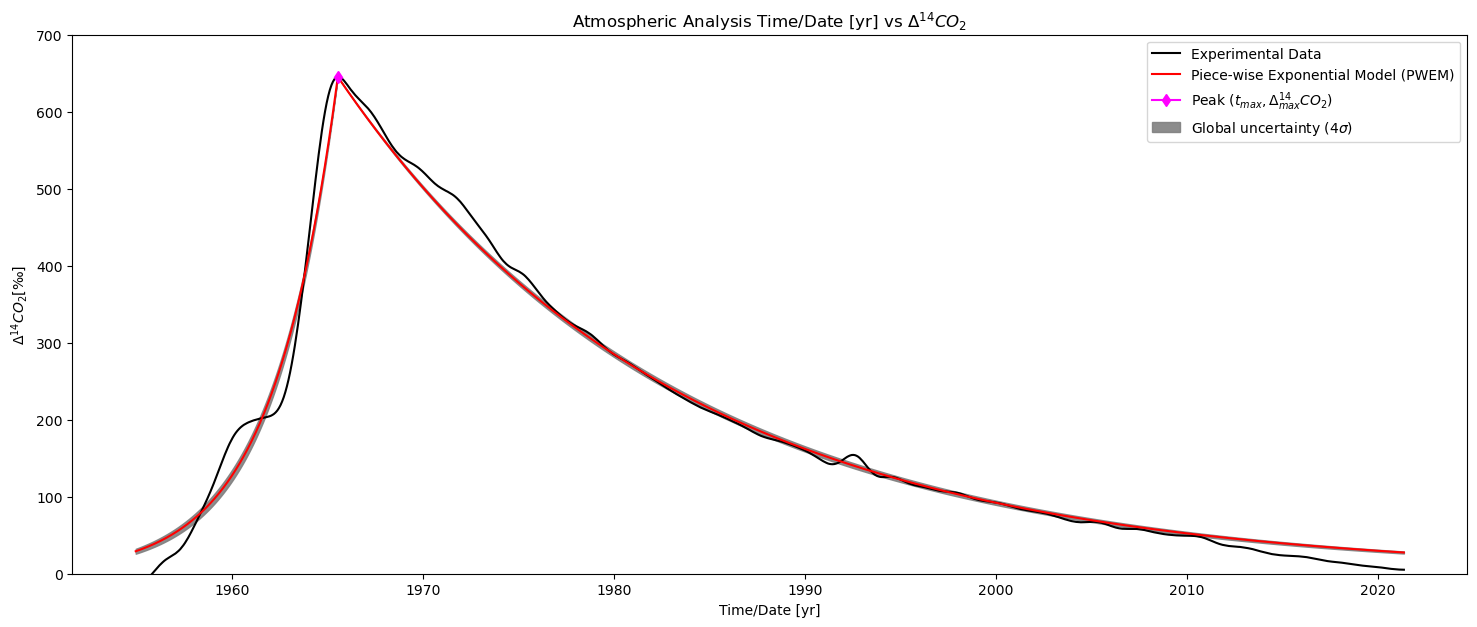

In [32]:
# Plot
plt.figure(figsize = (18,7))

plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")
plt.plot(new_date, new_dc14c, color = "r", label = "Piece-wise Exponential Model (PWEM)")
plt.plot(t_max,dc14c_max, marker="d", color="magenta",label="Peak ($t_{max},\Delta^{14}_{max}{CO}_2$)")

#plt.errorbar(new_date, new_dc14c, sigma_m, 0, marker = " ", linestyle= "-", color = "gray", alpha=0.05, label = "Global uncertainty ($4\sigma$)")

#I considered professor's advice to plot the errors as a a colored area around the model, but uncertainties are small compared with y values, therefore
#I've used 5sigma to have a better visual representation!

plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.9, label='Global uncertainty ($4\sigma$)')

plt.ylim(0,700)


plt.legend()
plt.show()
plt.close()

Yes, the model obtained matches the experimental data! 

#### Analysis:

(i) Now, you will compare your findings with four semi-empirical decay rate predictions, taken from the litarature. Create a function that uses your model, but uses four predictions for the decay rate ($k_{\rm atm}$, $k_{\rm bio}$, $k_{\rm oce}$, and $k_{\rm sed}$) to return four semi-empirical $\Delta^{14}\text{CO}_2$ decay lines as arrays. Consider the following decay rates based on four contributing factors:

- **Atmospheric decay** due to the mixing and exchange of carbon dioxide in the atmosphere predicts $k_{\rm atm}=0.10\,\rm yr^{-1}$.

- **Biosphere decay** due to vegetation, soil, and organic matter predicts $k_{\rm bio}=0.02\,\rm yr^{-1}$.

- **Ocean decay** due to the long-term ocean absorption and storage of carbon predicts $k_{\rm oce}=0.01\,\rm yr^{-1}$.

- **Sedimentary decay** due to decomposition and mineralization predicts $k_{\rm sed}=0.001\,\rm yr^{-1}$.



In [33]:
def exp_mod_ks(t):
    """  
    Evaluates the PWEM with different values for the decay rate.
    Input:
        t (array, float) -> Dates in years
    Output:
        (ys[0], ys[1], ys[2], ys[3]) (tuple, arrays) -> Tuple containing individual arrays that
                                                        have the evaluation of PWEM using a given k 
    Author: R.S.S.G.
    Date created: 20/09/2024
    """

    katm = 0.10
    kbio = 0.02
    koce = 0.01
    ksed = 0.001
    ks=[katm, kbio, koce, ksed]
    ys = []
    for i in ks:
        ys.append(exp_model(t,k_g,i))
       
    return (ys[0], ys[1], ys[2], ys[3])

In [34]:
#Calling the function
katm_dc14c, kbio_dc14c, koce_dc14c, ksed_dc14c = exp_mod_ks(new_date)

b(j) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing the empirical data, your best-fit model (obtained from your physically-motivated model, including the uncertainties), and four additional lines (one for every contributing factor above). Can we explain the observed decay of $\Delta^{14}\text{CO}_2$ as due to a single one of these contributing factors? If not, propose a possible decay model for $k_{\rm fit}$ based on all of them.

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22301/1697457350.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
/tmp/ipykernel_22301/1697457350.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta^{14}{CO}_2 [‰]]$')
/tmp/ipykernel_22301/1697457350.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.8, label='Global uncertainty ($4\sigma$)')


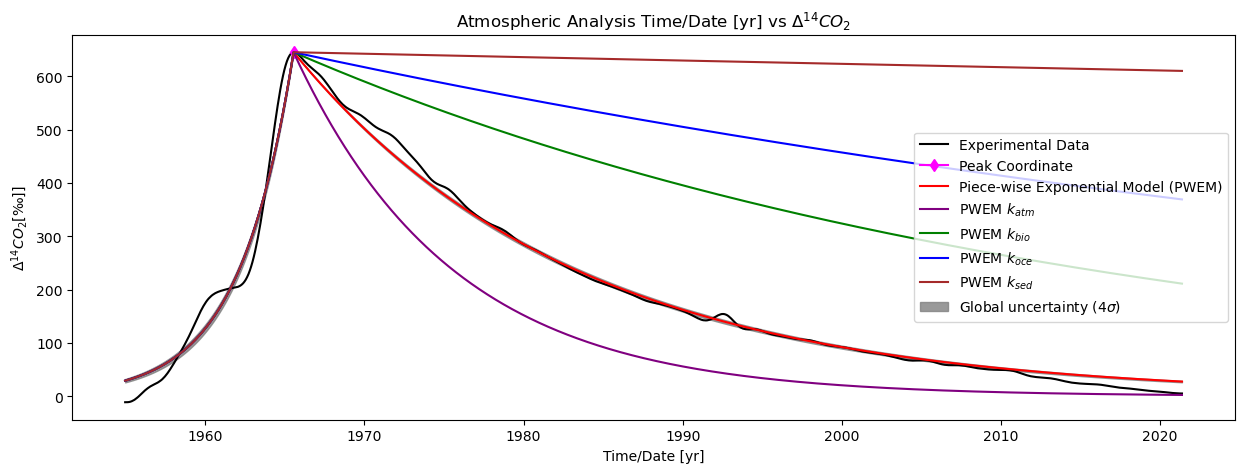

In [35]:
# Plot
plt.figure(figsize = (15,5))

plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta^{14}{CO}_2 [‰]]$')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")
plt.plot(t_max,dc14c_max, marker="d",label="Peak Coordinate", color = 'magenta')
plt.plot(new_date, new_dc14c, color = "r", label = "Piece-wise Exponential Model (PWEM)")
plt.plot(new_date, katm_dc14c, color = "purple", label = "PWEM $k_{atm}$")
plt.plot(new_date, kbio_dc14c, color = "g", label = "PWEM $k_{bio}$")
plt.plot(new_date, koce_dc14c, color = "blue", label = "PWEM $k_{oce}$")
plt.plot(new_date, ksed_dc14c, color = "brown", label = "PWEM $k_{sed}$")

plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.8, label='Global uncertainty ($4\sigma$)')


plt.legend(loc=5)
plt.show()
plt.close()

As we notice, the overall decay **cannot be explained as due to a sigle one of them**, however we can try to model the decay rate by using a **linear combination of this factors with weights as coefficients** to know how much each component should contribute until getting the our result! <br>
Where $k_{decay} = a \, k_{atm}+ b \, k_{bio} + c \, k_{oce} + d \, k_{sed}$<br>
So, we can write again our model, for $t > t_{max}$ as: 
$$y(t) = \Delta^{14}_{\rm max}\text{CO}_2 \, e^{-(a \, k_{atm}+ b \, k_{bio} + c \, k_{oce} + d \, k_{sed}) (t-t_{max})}  \text{,   } t > t_{\text{max}}$$

Now, employing a new regression we can find

In [36]:
def exp_model_mod(t, k1, a, b, c, d):
    """ 
    Piece-wise exponential model using the linear combination for k_decay
    
    Inputs:
        t (array, float) -> Date in years
        k1, a, b, c, d (float) -> Free parameters, k1 is the growth rate and (a,d) are the weights
        for each contributing factor k_i
    Output:
        y (array, float) -> CO2 relative difference in the ratio values. (evaluated using dates)

    Author: R.S.S.G.
    Date created: 23/09/2024
    Date modified: 24/09/2024
    """
    katm = 0.10
    kbio = 0.02
    koce = 0.01
    ksed = 0.001
    A = dc14c_max 
    B = dc14c_max
    y = np.piecewise(t,[t <= t_max, t > t_max], [lambda t: A*np.exp(k1*(t-t_max)),lambda t: B*np.exp(-(a * katm + b * kbio + c * koce + d * ksed)*(t-t_max))])
    
    return y

In [37]:
#Using curve_fit with small initial guesses as the function should not blow up!
coef_m, cova_m = opt.curve_fit(exp_model_mod, date, dc14c, p0=[0.02,0.5,0.2,0.5,0.5])

In [38]:
print(coef_m)

[ 2.92586176e-01  2.67196247e+02  1.43338423e+03  3.03515991e+03
 -8.56824399e+04]


In [39]:
reporting(coef_m,cova_m,["k_growth","a", "b","c","d"]) 

The parameters obtained in this regression were:
k_growth = 0.2925861756431693 +/- 0.0025795847542176673
a = 267.1962465985112 +/- 121466176.94739884
b = 1433.3842263547047 +/- 671466955.5375036
c = 3035.1599069861104 +/- 1322944663.7418218
d = -85682.43994166996 +/- 684092392.4189905


In [40]:
comb_dc14c = exp_model_mod(new_date,*coef_m)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22301/98250389.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
/tmp/ipykernel_22301/98250389.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')
/tmp/ipykernel_22301/98250389.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.8, label='Global uncertainty ($4\sigma$)')


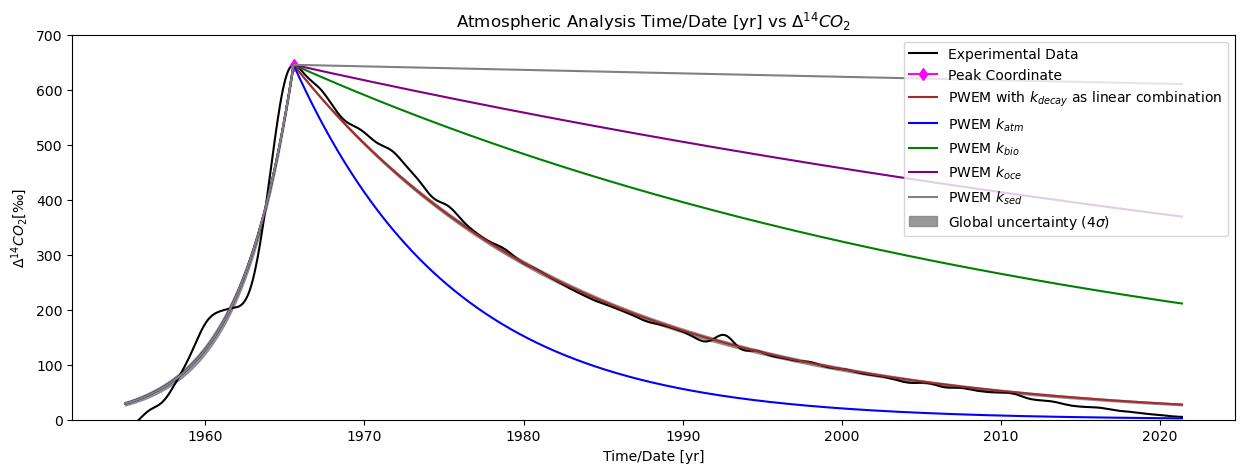

In [41]:
# Plot
plt.figure(figsize = (15,5))

plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")
plt.plot(t_max,dc14c_max, marker="d", color="magenta",label="Peak Coordinate")
#plt.plot(new_date, new_dc14c, color = "r", label = "Piece-wise Exponential Model (PWEM)")
plt.plot(new_date, comb_dc14c, color = "brown", label = "PWEM with $k_{decay}$ as linear combination")
plt.plot(new_date, katm_dc14c, color = "b", label = "PWEM $k_{atm}$")
plt.plot(new_date, kbio_dc14c, color = "g", label = "PWEM $k_{bio}$")
plt.plot(new_date, koce_dc14c, color = "purple", label = "PWEM $k_{oce}$")
plt.plot(new_date, ksed_dc14c, color = "gray", label = "PWEM $k_{sed}$")


plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.8, label='Global uncertainty ($4\sigma$)')

plt.ylim(0,700)


plt.legend(loc=1)
plt.show()

**Although** it matches the data and our previous model, this regression does not give us something useful as the weights are **non-physical** and the **uncertainties are even bigger than the coefficients!** <br>

Let's try a final different approach in the next section.

### Fixing Two Parameters and Solving a System of Linear Equations for b and c

**This is my definite answer for this problem.** 

Again, we can write for $t > t_{max}$ as: 
$$y(t) = \Delta^{14}_{\rm max}\text{CO}_2 \, e^{-(a \, k_{atm}+ b \, k_{bio} + c \, k_{oce} + d \, k_{sed}) (t-t_{max})}  \text{,   } t > t_{\text{max}}$$

However, to get the weights we can write the following relations as a system of equations <br>
$$k_{atm} \, a + k_{bio} \, b + k_{oce} \, c + k_{sed} \, d = k_{decay} $$
$$ a + b + c + d =1  $$

Fixing *a* and *b*, we get
$$k_{bio} \, b + k_{oce} \, c = k_{decay} - k_{atm} \, a - k_{sed} \, d  $$
$$ b + c =1-a-d  $$
Where I've chosen a = 0.5 as we know that our model is closer to the results given by $k_{atm}$, and therefore it should have a bigger contribution to the final rate. <br>
Simmilarly, d = 0.05 as it gives us the largest and farthest results from our model, thus it should have a smaller contribution to the overall decay rate.


Then, we can write the associated matrix A as
$$ A = \begin{pmatrix} k_{bio} & k_{oce} \\ 1 & 1 \end{pmatrix} $$
And the B vector as
$$ B = \begin{pmatrix} k_{decay} - k_{atm}\, a - k_{sed} \, d \\ 1 - a - d \end{pmatrix}$$

In [42]:
katm = 0.10
kbio = 0.02
koce = 0.01
ksed = 0.001

# Fixing two of the parameters
a=0.5
d=0.05

# Matrix A and vector B for the system of equations
A = np.array([[kbio,koce],[1,1]])
B = np.array([[k_d - (a*katm) -(d*ksed)],[1-a-d]])
# Solving it using np.linalg
X = np.linalg.solve(A,B)

In [43]:
# Defining b and c
b = X[0][0]
c = X[1][0]

In [44]:
# Check if it actually satisfies our conditions
print(a*katm+b*kbio+c*koce+d*ksed == k_d)

print(a+b+c+d == 1)   

True
True


In [62]:
print("Our coefficients are:\n a = %.5f \n b = %.5f \n c = %.5f \n d = %.5f " %(a, b, c, d))

Our coefficients are:
 a = 0.50000 
 b = 0.19183 
 c = 0.25817 
 d = 0.05000 


In [46]:
def exp_model_mod2(t, k1, b, c):
    """ 
    Piece-wise exponential model using the linear combination for k_decay

    Inputs:
        t (array, float) -> Date in years
        k1, b, c, (float) -> Free parameters, k1 is the growth rate and (b,c) are the weights
        for each contributing factor k_i
    Output:
        y (array, float) -> CO2 relative difference in the ratio values. (evaluated using dates and weighted k's)

    Author: R.S.S.G.
    Date created: 25/09/2024
    """
    katm = 0.10
    kbio = 0.02
    koce = 0.01
    ksed = 0.001
    #Fixing a and d
    d=0.05
    a=0.5
    A = dc14c_max 
    B = dc14c_max
    y = np.piecewise(t,[t <= t_max, t > t_max], [lambda t: A*np.exp(k1*(t-t_max)),lambda t: B*np.exp(-((a * katm + b * kbio + c * koce + d * ksed))*(t-t_max))])
    
    return y

In [47]:
comb_dc14c_2 = exp_model_mod2(new_date,k_g,b,c)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22301/3408766694.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
/tmp/ipykernel_22301/3408766694.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')
/tmp/ipykernel_22301/3408766694.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.8, label='Global uncertainty ($4\sigma$)')


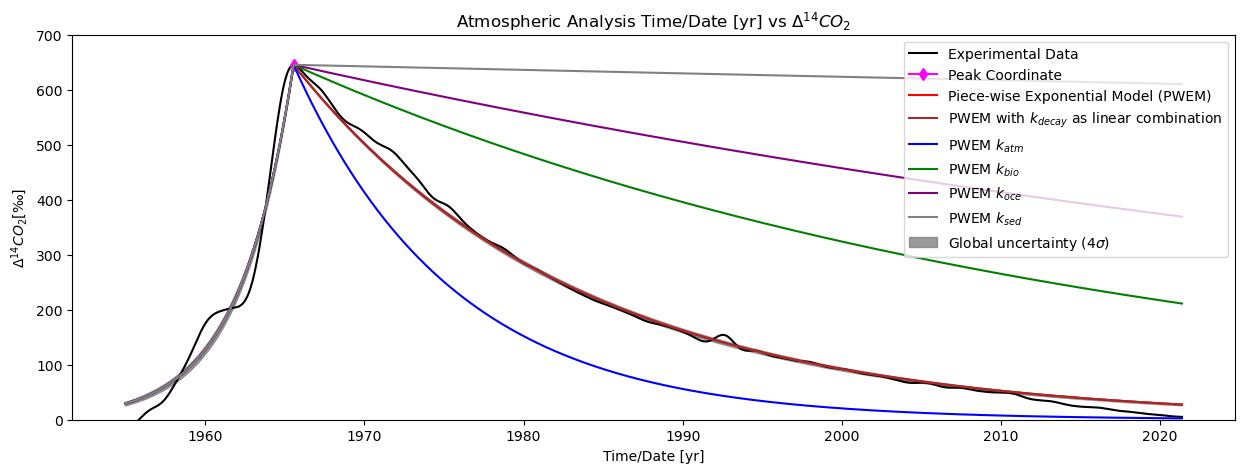

In [48]:
# Plot
plt.figure(figsize = (15,5))

plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")
plt.plot(t_max,dc14c_max, marker="d", color="magenta",label="Peak Coordinate")
plt.plot(new_date, new_dc14c, color = "r", label = "Piece-wise Exponential Model (PWEM)")
plt.plot(new_date, comb_dc14c_2, color = "brown", label = "PWEM with $k_{decay}$ as linear combination")
plt.plot(new_date, katm_dc14c, color = "b", label = "PWEM $k_{atm}$")
plt.plot(new_date, kbio_dc14c, color = "g", label = "PWEM $k_{bio}$")
plt.plot(new_date, koce_dc14c, color = "purple", label = "PWEM $k_{oce}$")
plt.plot(new_date, ksed_dc14c, color = "gray", label = "PWEM $k_{sed}$")

plt.fill_between(new_date, exp_model(new_date, *coef) - 4*sigma_m, exp_model(new_date, *coef) + 4*sigma_m,color='gray', alpha=0.8, label='Global uncertainty ($4\sigma$)')

plt.ylim(0,700)


plt.legend(loc=1)
plt.show()

**This approach give us more realistical weights and the results match exactly with the data and our model!**<br> However, we don't have the uncertainties of the parameters as we've fixed two of them.

### Extra: Rejected attempts for this last part

I've work on this last part the previous days trying to find a more "formal" solution that works in the goal of finding the right weights or coefficients in the combination of these contributions from different k's.<br>
Although the previous section "works", I wanted to add this part just to show two of my failed-attempts.  

#### Linear Combination of Exponentials

We can write again our model, for $t > t_{max}$ as: 
$$y(t) = \Delta^{14}_{\rm max}\text{CO}_2 \, (a*e^{k_{atm}(t-t_{max})}+b*e^{k_{bio}(t-t_{max})}+c*e^{k_{oce}(t-t_{max})}+d*e^{k_{sed}(t-t_{max})}) \text{, } t > t_{\text{max}}$$

In [49]:
def exp_model_mod3(t, k1, a,b,c,d):
    """ 
    Piece-wise exponential model using the linear combination for k_decay
    
    Inputs:
        t (array, float) -> Date in years
        k1, a, b, c, d (float) -> Free parameters, k1 is the growth rate and (a,b,c,d) are the weights
        for each contributing factor k_i
    Output:
        y (array, float) -> CO2 relative difference in the ratio values. (evaluated using dates)

    Author: R.S.S.G.
    Date created: 24/09/2024
    """
    katm = 0.10
    kbio = 0.02
    koce = 0.01
    ksed = 0.001
    A = dc14c_max
    B = dc14c_max
    y = np.piecewise(t,[t <= t_max, t > t_max], [lambda t: A*np.exp(k1*(t-t_max)),lambda t: B*(a*np.exp(-katm*(t-t_max))+b*np.exp(-kbio*(t-t_max))+c*np.exp(-koce*(t-t_max))+d*np.exp(-ksed*(t-t_max))/(a+b+c+d))])
    
    return y

In [50]:
#Using curve_fit with small initial guesses as the function should not blow up!
coef_m3, cova_m3 = opt.curve_fit(exp_model_mod3, date, dc14c)

In [51]:
print(coef_m3)

[ 0.29258618  0.37605209  2.52472098 -2.5493374   0.77173806]


In [52]:
reporting(coef_m3,cova_m3,["k_growth","a","b","c","d"]) 

The parameters obtained in this regression were:
k_growth = 0.29258617590202 +/- 0.0023105877366973162
a = 0.3760520934322355 +/- 0.02505466391463142
b = 2.5247209787951252 +/- 0.22665974665143448
c = -2.5493373956485232 +/- 0.328606885582697
d = 0.7717380617298977 +/- 0.1664446357101533


In [53]:
comb_dc14c_3 = exp_model_mod3(new_date,*coef_m3)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_22301/472682161.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
/tmp/ipykernel_22301/472682161.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')


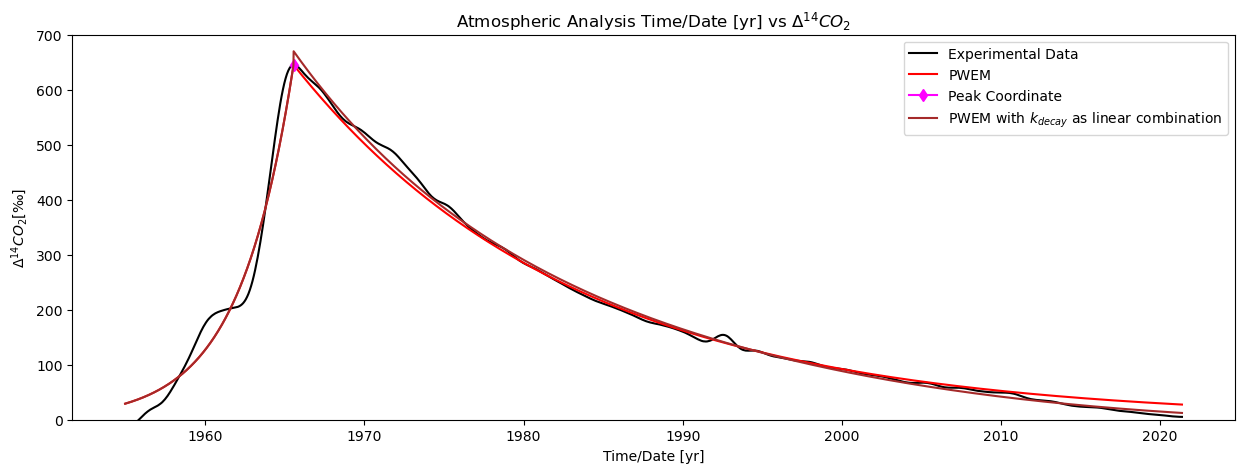

In [54]:
# Plot
plt.figure(figsize = (15,5))

plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")
plt.plot(new_date, new_dc14c, color = "red", label = "PWEM")
plt.plot(t_max,dc14c_max, marker="d", color="magenta",label="Peak Coordinate")
plt.plot(new_date, comb_dc14c_3, color = "brown", label = "PWEM with $k_{decay}$ as linear combination")
#plt.plot(new_date, katm_dc14c, color = "b", label = "PWEM $k_{atm}$")
#plt.plot(new_date, kbio_dc14c, color = "g", label = "PWEM $k_{bio}$")
#plt.plot(new_date, koce_dc14c, color = "purple", label = "PWEM $k_{oce}$")
#plt.plot(new_date, ksed_dc14c, color = "gray", label = "PWEM $k_{sed}$")

plt.ylim(0,700)


plt.legend(loc=1)
plt.show()

#### Fixing them and using regression 

In [55]:
def exp_model_mod4(t, k1, a, d):
    """ 
    Piece-wise exponential model using the linear combination for k_decay
    
    Inputs:
        t (array, float) -> Date in years
        k1, a, b, c, d (float) -> Free parameters, k1 is the growth rate and (a,d) are the weights
        for each contributing factor k_i
    Output:
        y (array, float) -> CO2 relative difference in the ratio values. (evaluated using dates)

    Author: R.S.S.G.
    Date created: 24/09/2024
    """
    katm = 0.10
    kbio = 0.02
    koce = 0.01
    ksed = 0.001
    #a=0.5
    b=0.2
    c=0.15
    #d=0.15
    A = dc14c_max 
    B = dc14c_max
    y = np.piecewise(t,[t <= t_max, t > t_max], [lambda t: A*np.exp(k1*(t-t_max)),lambda t: B*np.exp(-(((a * katm + b * kbio + c * koce + d * ksed)/(a+b+c+d))*(t-t_max)))])
    
    return y

In [56]:
#Using curve_fit with small initial guesses as the function should not blow up!
coef_m4, cova_m4 = opt.curve_fit(exp_model_mod4, date,dc14c,p0=[0.29,0.5,0.1])

In [57]:
reporting(coef_m4,cova_m4,["k_growth","a","d"]) 

The parameters obtained in this regression were:
k_growth = 0.29258617564851186 +/- 0.0025763379580671345
a = 0.2609797371322886 +/- 55104.118753673916
d = -0.052332366270463754 +/- 43244.8749589425


In [58]:
comb_dc14c_4 = exp_model_mod4(new_date,*coef_m4)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_22301/2597009210.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
/tmp/ipykernel_22301/2597009210.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')


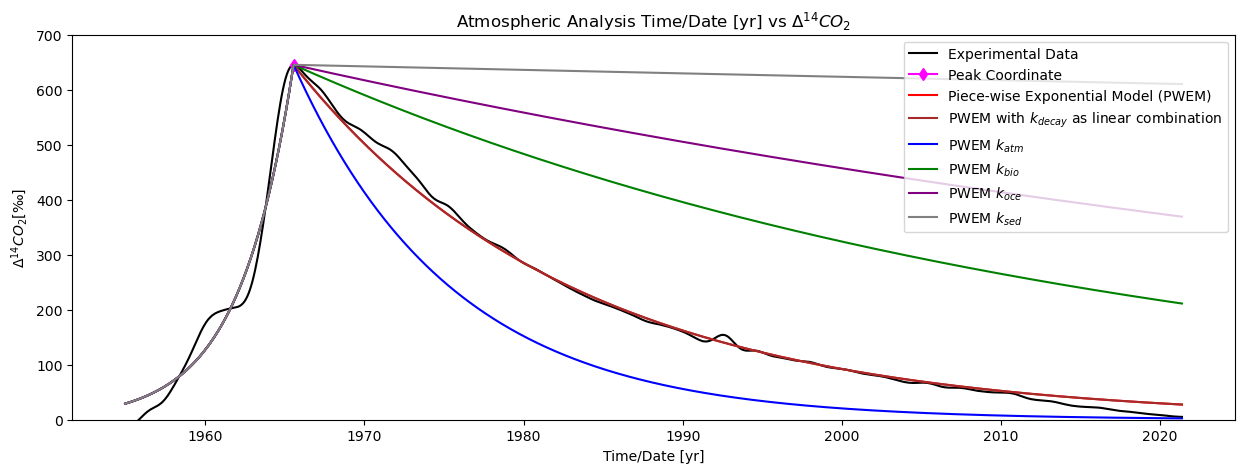

In [59]:
# Plot
plt.figure(figsize = (15,5))

plt.title('Atmospheric Analysis Time/Date [yr] vs $\Delta^{14}{CO}_2$')
plt.xlabel('Time/Date [yr]')
plt.ylabel('$\Delta^{14}{CO}_2 [‰]$')

plt.plot(date, dc14c, color = "k", label = "Experimental Data")
plt.plot(t_max,dc14c_max, marker="d", color="magenta",label="Peak Coordinate")
plt.plot(new_date, new_dc14c, color = "r", label = "Piece-wise Exponential Model (PWEM)")
plt.plot(new_date, comb_dc14c_4, color = "brown", label = "PWEM with $k_{decay}$ as linear combination")
plt.plot(new_date, katm_dc14c, color = "b", label = "PWEM $k_{atm}$")
plt.plot(new_date, kbio_dc14c, color = "g", label = "PWEM $k_{bio}$")
plt.plot(new_date, koce_dc14c, color = "purple", label = "PWEM $k_{oce}$")
plt.plot(new_date, ksed_dc14c, color = "gray", label = "PWEM $k_{sed}$")

plt.ylim(0,700)


plt.legend(loc=1)
plt.show()